<a href="https://colab.research.google.com/github/savitaChari/W207-Final-Project-Group3_Section6/blob/main/Model/W207_Final_Project_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA PREPROCESSING AND FEATURE ENGINEERING

### Background
To ensure our models are based on significant, abundant data, we began by executing data preprocessing techniques including reverse hot encoding of sparse data, scaling our data, and feature selecting relevant attributes. These techniques will help drive the high accuracies in different types of models used to predict forest cover types.




### SETUP
<hr>

In [1]:
import pandas as pd
import numpy as np
import random 
import itertools 
from zipfile import ZipFile

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

### GET DATA
<hr>

In [20]:
with ZipFile("../train.zip") as myzip:
    data = myzip.open("train.csv")
    train_df = pd.read_csv(data)
    train_df.drop(train_df.columns[0], axis = 1, inplace = True)
    
with ZipFile("../val.zip") as myzip:
    data = myzip.open("val.csv")
    val_df = pd.read_csv(data)
    val_df.drop(val_df.columns[0], axis = 1, inplace = True)

with ZipFile("../test.zip") as myzip:
    data = myzip.open("test.csv")
    test_df = pd.read_csv(data)
    test_df.drop(test_df.columns[0], axis = 1, inplace = True)
    

In [11]:
# split our datasets into data and labels
x_train = train_df.values[:, :-1]
y_train  = train_df.values[:, -1]
x_val = val_df.values[:, :-1]
y_val  = val_df.values[:, -1]
x_test = test_df.values[:, :-1]
y_test  = test_df.values[:, -1]

### FEATURE SELECTION DATASET
<hr>

In [15]:
#create dataset with feature selection
train_df2 = train_df.drop(columns='Hillshade_3pm')
val_df2 = val_df.drop(columns='Hillshade_3pm')
test_df2 = test_df.drop(columns='Hillshade_3pm')

x_train2 = train_df2.values[:, :-1]
y_train2  = train_df2.values[:, -1]
x_val2 = val_df2.values[:, :-1]
y_val2  = val_df2.values[:, -1]
x_test2 = test_df2.values[:, :-1]
y_test2  = test_df2.values[:, -1]


Our random forest classified 96.31% of the of the trees correctly


# Baseline

### We will set a baseline model to understand how much our other models performance improved

In [16]:
# dummy baseline
dummy = DummyClassifier(strategy='stratified', random_state = 1)

#train the model with training data
dummy.fit(x_train, y_train)

#get accuracy score
baseline_accuracy = round(dummy.score(x_val, y_val),2)
print(f"Our dummy algorithm classified {baseline_accuracy*100}% of the trees correctly")

Our dummy algorithm classified 38.0% of the trees correctly


# KNN Model Analysis and Hyperparameter Tuning

### We will first determine if we should use feature selected dataset or the full data set within our KNN model based on randomly chosen KNN model parameters

In [17]:
# KNN model based on full dataset
KNN_model = KNeighborsClassifier(n_neighbors = 5)
KNN_model.fit(x_train, y_train)
KNN_model_accuracy = round(KNN_model.score(x_val, y_val),5)
print(f"The accuracy of the original KNN model with the full data set is {KNN_model_accuracy*100}%")

The accuracy of the original KNN model with the full data set is 92.01599999999999%


In [18]:
# KNN model based on feature selected dataset
KNN_model_fs = KNeighborsClassifier(n_neighbors = 5)
KNN_model_fs.fit(x_train2, y_train2)
KNN_model_fs_accuracy = round(KNN_model_fs.score(x_val2, y_val2),5)
print(f"The accuracy of the KNN model with the feature selected data set is {KNN_model_fs_accuracy*100}%")

The accuracy of the KNN model with the feature selected data set is 92.414%


Because the feature selected model has a higher accuracy of about 0.4%, we will use the feature selected data set for our hyperparameter tuning.

### We will attempt to improve upon our Random Forest model by analyzing a KNN model as well and modifying the following hyperparameters: 
- Number of neighbors 
- Weights 
- Distance formula (Manhattan or Euclidean) 

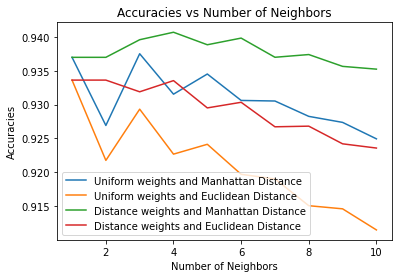

In [19]:
# KNN model analysis
# set hyperparameters
n = [1,2,3,4,5,6,7,8,9,10] # number of neighbors
w_u = 'uniform' # weights{‘uniform’, ‘distance’} or callable, default=’uniform’
w_d = 'distance'
p_value_m = 1 #Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2, default=2
p_value_e = 2

# Create KNN models across different numbers of neighbors
UM_combined_accuracies = []
UE_combined_accuracies = []
DM_combined_accuracies = []
DE_combined_accuracies = []

for i in n:
  UM_model = KNeighborsClassifier(n_neighbors=i, weights=w_u, p=p_value_m)
  UM_model.fit(x_train2, y_train2)
  UE_model = KNeighborsClassifier(n_neighbors=i, weights=w_u, p=p_value_e)
  UE_model.fit(x_train2, y_train2)
  DM_model = KNeighborsClassifier(n_neighbors=i, weights=w_d, p=p_value_m)
  DM_model.fit(x_train2, y_train2)
  DE_model = KNeighborsClassifier(n_neighbors=i, weights=w_d, p=p_value_e)
  DE_model.fit(x_train2, y_train2)  

  # Determine the main metric of evaluation: Accuracy
  UM_model_accuracy = UM_model.score(x_val2, y_val2)
  UM_combined_accuracies.append(UM_model_accuracy)
  UE_model_accuracy = UE_model.score(x_val2, y_val2)
  UE_combined_accuracies.append(UE_model_accuracy)
  DM_model_accuracy = DM_model.score(x_val2, y_val2)
  DM_combined_accuracies.append(DM_model_accuracy)
  DE_model_accuracy = DE_model.score(x_val2, y_val2)
  DE_combined_accuracies.append(DE_model_accuracy)

# Plot impact of number of neighbors on accuracies 
plt.figure()
plt.plot(n, UM_combined_accuracies, label = "Uniform weights and Manhattan Distance")
plt.plot(n, UE_combined_accuracies, label = "Uniform weights and Euclidean Distance")
plt.plot(n, DM_combined_accuracies, label = "Distance weights and Manhattan Distance")
plt.plot(n, DE_combined_accuracies, label = "Distance weights and Euclidean Distance")
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracies')
plt.legend()
plt.title('Accuracies vs Number of Neighbors')
plt.show()

The highest performing KNN model has 4 neighbors, uses the distance weight and manhattan distance. Below you will see our further analysis of metrics of evaluation to evaluate model performance.

In [ ]:
# KNN model with the hyperparameters that produce the highest accuracy: distance weights, Manhattan Distance, and 4 neighbors
# set hyperparameters

# Create KNN model
best_KNN_model = KNeighborsClassifier(n_neighbors=4, weights='distance', p=1)
best_KNN_model.fit(x_train2, y_train2)

# Determine the main metric of evaluation: Accuracy
best_KNN_model_accuracy = best_KNN_model.score(x_val2, y_val2)
print(f"Accuracy of the KNN model with distance weights, Manhattan Distance, and 4 neighbors is {best_KNN_model_accuracy}")

# Determine the supplementary metrics of evaluation: Precision, Recall, and F1
KNN_pred_labels = best_KNN_model.predict(x_val2)
KNN_classification = classification_report(y_val2, KNN_pred_labels) # reports Precision, Recall, and F1 Score
print(f"The classification of KNN model is {KNN_classification}")

# Create a confusion matrix for the model
print(confusion_matrix(y_val2, KNN_pred_labels))

Accuracy of the KNN model with distance weights, Manhattan Distance, and 5 neighbors is 0.940136834984544
The classification of KNN model is               precision    recall  f1-score   support

         1.0       0.94      0.94      0.94     42595
         2.0       0.95      0.95      0.95     56956
         3.0       0.93      0.92      0.92      7334
         4.0       0.85      0.81      0.83       532
         5.0       0.85      0.82      0.84      1901
         6.0       0.84      0.86      0.85      3431
         7.0       0.95      0.95      0.95      4034

    accuracy                           0.94    116783
   macro avg       0.90      0.89      0.90    116783
weighted avg       0.94      0.94      0.94    116783

[[39987  2378     3     0    34     9   184]
 [ 2126 54271   142     3   218   159    37]
 [    3   129  6761    48    17   376     0]
 [    0     2    72   432     0    26     0]
 [   41   266    18     0  1568     8     0]
 [    6   142   310    24     6  2943

The highest performing KNN model has an accuracy of 94%. This model used data preprocessing, feature engineering, and hyperparameter tuning to find the optimal model. This model is 56% better than predicting forest cover types than our baseline model. Based on the F1 score, our model is worst at predicting forest cover types 3 with a score of 0.83 and best at predicting forest cover type 1 and 6 with an F1 score of 0.95. Based on the confusion matrix, we can see that forest covers of type 0 are most regulary confused for type 1 and vice versa, forest covers of type 1 are often mistaken for type 0. The most mistakes were found when predicting forest cover type 1 with 2949 incorrect predictions. The reason 0 and 1 types have so many incorrect predictions with relatively high F1 scores is because the data has the most instances of type 0 and 1 forest covers.